In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Karachi 100 Historical Data (1).csv to Karachi 100 Historical Data (1) (2).csv


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
raw_cvs_data = pd.read_csv('Karachi 100 Historical Data (1).csv')
df_PSX100=raw_cvs_data.copy()
df_PSX100.Date = pd.to_datetime(df_PSX100.Date, dayfirst = True)
df_PSX100.set_index("Date", inplace=True)
df_PSX100=df_PSX100.asfreq('b')
data=df_PSX100.fillna(method='ffill')
data['Price']=data['Price'].str.replace(',',"").astype(float)

In [ ]:
raw_cvs_data

,Date,Price
0,8/17/2023,"48,386.12"
1,8/16/2023,"48,146.43"
2,8/15/2023,"48,565.75"
3,8/11/2023,"48,424.40"
4,8/10/2023,"47,808.34"
...,...,...
396,1/7/2022,"45,345.65"
397,1/6/2022,"45,082.30"
398,1/5/2022,"45,407.89"
399,1/4/2022,"45,390.84"


In [ ]:
size = int(len(df_PSX100)*0.8)
df, df_test = df_PSX100.iloc[:size], df_PSX100.iloc[size:]

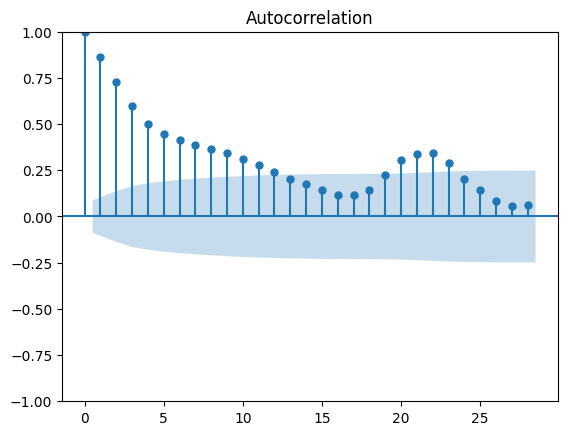

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)
plt.show()

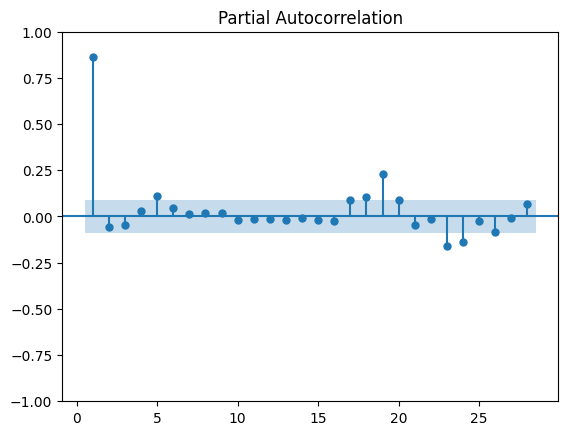

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data,zero=False)
plt.show()

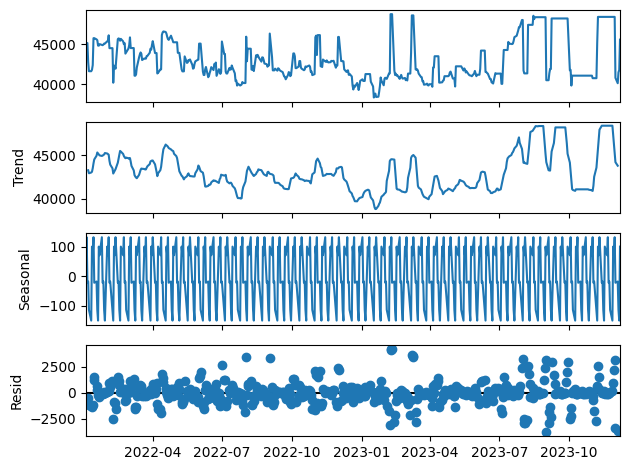

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = data
result = seasonal_decompose(series, model='additive',period=7)
result.plot()
pyplot.show()

In [ ]:
X=data.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=43051.207659, mean2=43045.119286
variance1=2819240.217293, variance2=10471347.124843


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
if result[0]>0.05:
  print('Series is not Stationary')
else:
  print("Series is stationary")

ADF Statistic: -2.106992
p-value: 0.241712
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570
Series is stationary


In [ ]:
from statsmodels.tsa.stattools import kpss
result = kpss(df)
print("p-values are: %f " % result[1])

p-values are: 0.010000 


In [ ]:
size = int(len(df)*0.8)
df, df_test = df.iloc[:size], df.iloc[size:]

In [ ]:
model=ARIMA(df,order=(1,0,1),seasonal_order=(1,1,1,7))

In [ ]:
result = model.fit()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions = result.predict(start=len(df+1), end= len(df)+len(df_test)-1, dynamic=False)

rmse = sqrt(mean_squared_error(df_test.Price, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1835.035


In [ ]:
test=df_test

In [ ]:
test['prediction']=predictions

In [ ]:
test.head()

,Price,prediction,difference
Date,,,
2023-03-29,39879.89,40266.142257,-386.252257
2023-03-30,39848.35,40214.054121,-365.704121
2023-03-31,40000.83,39568.794849,432.035151
2023-04-03,40000.83,39323.321587,677.508413
2023-04-04,39687.26,39037.883434,649.376566


In [ ]:
test['difference']=test["Price"]-test['prediction']

In [ ]:
df2 = pd.DataFrame({'Actual': test.Price, 'Predicted': test.prediction})

<Axes: xlabel='Date'>

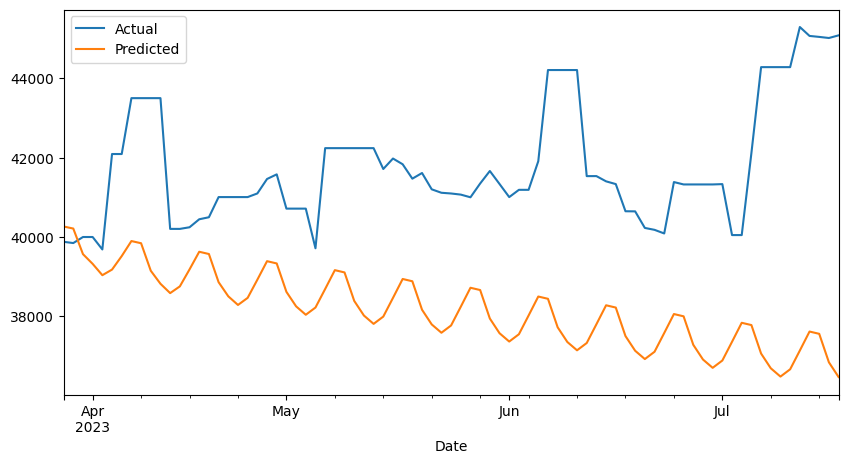

In [ ]:
df2.plot(kind='line',figsize=(10,5))